In [2]:
suppressPackageStartupMessages({
    source('../libs.R')
    source('../utils.R')    
    source('../Figures/colors.R')
    source('../utils_mapping.R')
    source('../utils_plotting.R')
})


# Munge

## meta data

In [3]:
meta_data <- fread('/data/srlab2/ik936/Roche/data/lung/Travaglini/krasnow_hlca_10x_metadata.csv')

In [4]:
table(meta_data$region)


normal 
 65662 

In [5]:
unique(meta_data$free_annotation)

[1] "Capillary Aerocyte"                  
 [2] "Capillary"                           
 [3] "Capillary Intermediate 1"            
 [4] "Capillary Intermediate 2"            
 [5] "IGSF21+ Dendritic"                   
 [6] "Myeloid Dendritic Type 1"            
 [7] "Plasmacytoid Dendritic"              
 [8] "Myeloid Dendritic Type 2"            
 [9] "B"                                   
[10] "EREG+ Dendritic"                     
[11] "Macrophage"                          
[12] "CD8+ Naive T"                        
[13] "CD4+ Naive T"                        
[14] "CD4+ Memory/Effector T"              
[15] "Vein"                                
[16] "Artery"                              
[17] "Pericyte"                            
[18] "Vascular Smooth Muscle"              
[19] "Club"                                
[20] "Mucous"                              
[21] "Alveolar Epithelial Type 2"          
[22] "Basal"                               
[23] "Lymphatic"                           
[24] "Proliferating Macrophage"            
[25] "CD8+ Memory/Effector T"              
[26] "Proliferating NK/T"                  
[27] "Natural Killer T"                    
[28] "Natural Killer"                      
[29] "OLR1+ Classical Monocyte"            
[30] "Basophil/Mast 1"                     
[31] "Classical Monocyte"                  
[32] "Intermediate Monocyte"               
[33] "Nonclassical Monocyte"               
[34] "Airway Smooth Muscle"                
[35] "Ciliated"                            
[36] "Alveolar Fibroblast"                 
[37] "Myofibroblast"                       
[38] "Adventitial Fibroblast"              
[39] "Alveolar Epithelial Type 1"          
[40] "Platelet/Megakaryocyte"              
[41] "TREM2+ Dendritic"                    
[42] "Differentiating Basal"               
[43] "Proliferating Basal"                 
[44] "Plasma"                              
[45] "Bronchial Vessel 2"                  
[46] "Bronchial Vessel 1"                  
[47] "Lipofibroblast"                      
[48] "Mesothelial"                         
[49] "Basophil/Mast 2"                     
[50] "Signaling Alveolar Epithelial Type 2"
[51] "Proximal Basal"                      
[52] "Neuroendocrine"                      
[53] "Fibromyocyte"                        
[54] "Ionocyte"                            
[55] "Serous"                              
[56] "Proximal Ciliated"                   
[57] "Goblet"

In [6]:
t(head(meta_data))

V1,P2_1_AAACCTGAGAAACCAT,P2_1_AAATGCCAGATGAGAG,P2_1_AACACGTTCGATCCCT,P2_1_AACACGTTCGCACTCT,P2_1_AACCATGCAGCTCGCA,P2_1_AACCGCGAGTCATCCA
nGene,1347,1713,1185,1378,1210,2218
nUMI,2914,4226,2152,3419,2514,6193
orig.ident,Human Lung 10x - Patient 2,Human Lung 10x - Patient 2,Human Lung 10x - Patient 2,Human Lung 10x - Patient 2,Human Lung 10x - Patient 2,Human Lung 10x - Patient 2
channel,P2_1,P2_1,P2_1,P2_1,P2_1,P2_1
tissue,lung,lung,lung,lung,lung,lung
region,normal,normal,normal,normal,normal,normal
percent.ribo,0.03534660,0.06105064,0.04832714,0.03275812,0.05011933,0.05942193
free_annotation,Capillary Aerocyte,Capillary Aerocyte,Capillary Aerocyte,Capillary Aerocyte,Capillary Aerocyte,Capillary Aerocyte
patient,2,2,2,2,2,2
sample,distal 2,distal 2,distal 2,distal 2,distal 2,distal 2


## count data 

In [7]:
counts <- fread('/data/srlab2/ik936/Roche/data/lung/Travaglini/krasnow_hlca_10x_UMIs.csv') %>% 
    data.frame() %>% 
    tibble::column_to_rownames('V1') %>% 
    as('matrix') %>% 
    as('dgCMatrix')

In [13]:
all(meta_data$V1 == colnames(counts))

[1] TRUE

## Subset stromal 

In [14]:
meta_data <- meta_data %>% 
    subset(free_annotation %in% c(
        'Airway Smooth Muscle',
        'Vascular Smooth Muscle',
        'Myofibroblast',
        'Fibromyocyte',
        'Adventitial Fibroblast',
        'Alveolar Fibroblast', 
        'Lipofibroblast',
        'Pericyte', 
        'Mesothelial'
    )
)

In [15]:
counts <- counts[, meta_data$V1]

## Cache

In [16]:
saveRDS(meta_data, '/data/srlab2/ik936/Roche/data/lung/Travaglini/stromal_meta.rds')
saveRDS(counts, '/data/srlab2/ik936/Roche/data/lung/Travaglini/stromal_counts.rds')

## de novo 

The paper actually had no UMAPs or tSNEs, so it's not clear how (dis)similar the populations are


In [17]:
meta_data <- readRDS('/data/srlab2/ik936/Roche/data/lung/Travaglini/stromal_meta.rds')
counts <- readRDS('/data/srlab2/ik936/Roche/data/lung/Travaglini/stromal_counts.rds')

Warning message in create_object(counts, meta_data, do_qc = FALSE):
“weights not initialized in metadata. Setting all to 1.”
start normalization

start vargenes

start pca

use_weights



[1] FALSE


use_weights

use_weights



[1] FALSE


use_weights

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10



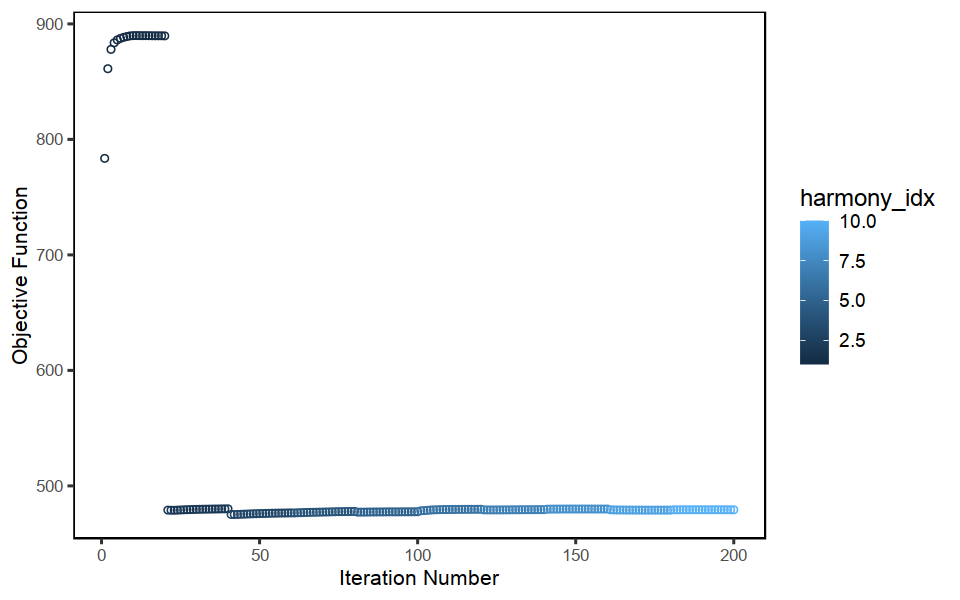

In [18]:
fig.size(5, 8)
set.seed(1)
trav <- create_object(counts, meta_data, do_qc=FALSE) %>% 
    do_harmony(
        'orig.ident', theta=.5, 
        max.iter.harmony=10, max.iter.cluster=20,
        epsilon.cluster = -Inf, epsilon.harmony = -Inf, 
        plot_convergence = TRUE
    )


In [19]:
trav$U <- do_umap(t(trav$Z_cos), NULL, 1.0, 0.3)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


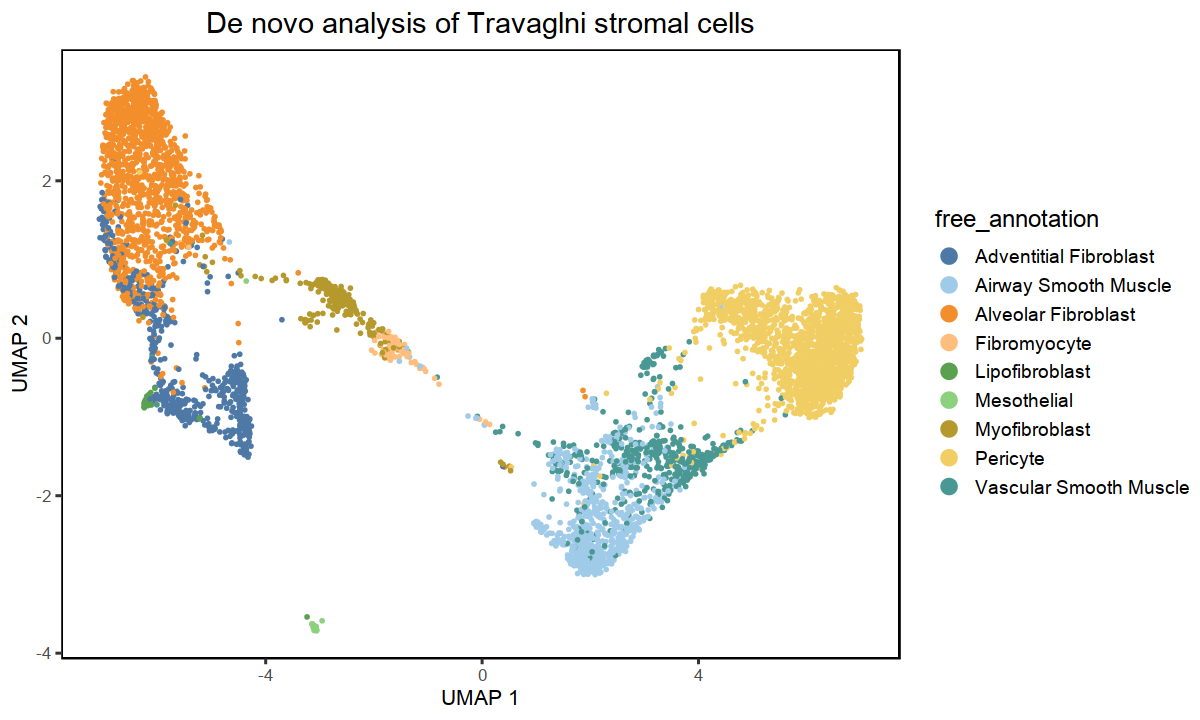

In [20]:
fig.size(6, 10)
do_scatter(trav$U$embedding, trav$meta_data, 'free_annotation', do_labels=FALSE, no_guides=FALSE, pt_shape=16, point_size=1) + 
    labs(title = 'De novo analysis of Travaglni stromal cells')

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


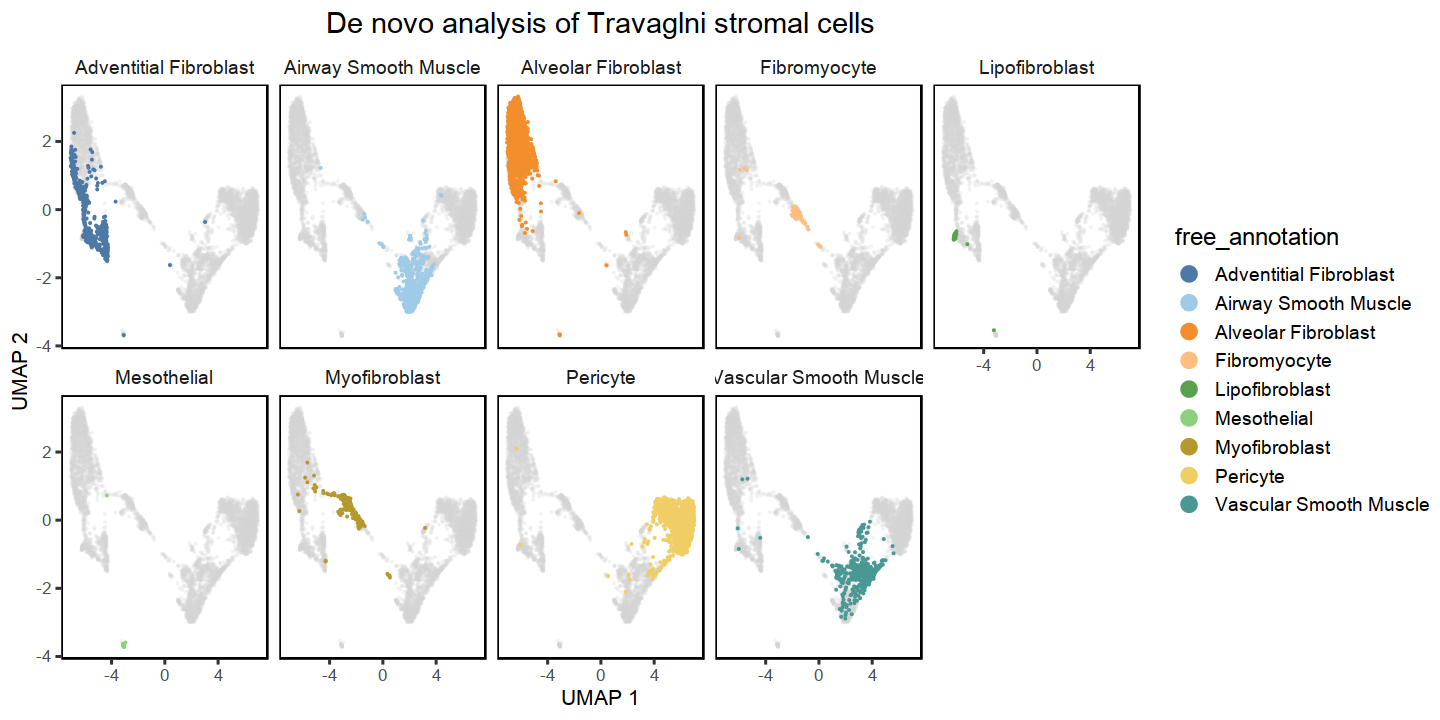

In [21]:
fig.size(6, 12)
do_scatter(trav$U$embedding, trav$meta_data, 'free_annotation', quo(free_annotation), nrow=2, do_labels=FALSE, no_guides=FALSE, pt_shape=16, point_size=.5) + 
    labs(title = 'De novo analysis of Travaglni stromal cells')

# All stromal cells to lung atlas 

## Stromal Roche lung object

Keep all stromal cells. 


In [22]:
lung <- readRDS('/data/srlab2/ik936/Roche/data/cache/lung_obj_stromal.rds')

In [23]:
table(lung$meta_data$lineage)


endothelial  fibroblast       mural 
       7449        1442         816 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Ignoring unknown parameters: segment.size”
Warning message:
“Ignoring unknown parameters: label.size, segment.size”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


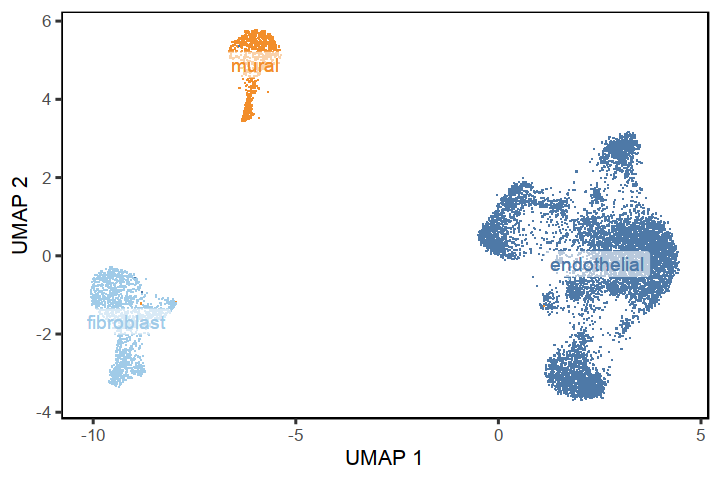

In [24]:
fig.size(4, 6)
do_scatter(lung$umap_after, lung$meta_data, 'lineage')

In [25]:
meta_data <- subset(lung$meta_data, lineage %in% c('mural', 'fibroblast'))
counts <- lung$exprs_raw[, meta_data$CellID]

start filter

start normalization

start vargenes

start pca

use_weights



[1] FALSE


use_weights

use_weights



[1] FALSE


use_weights

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10



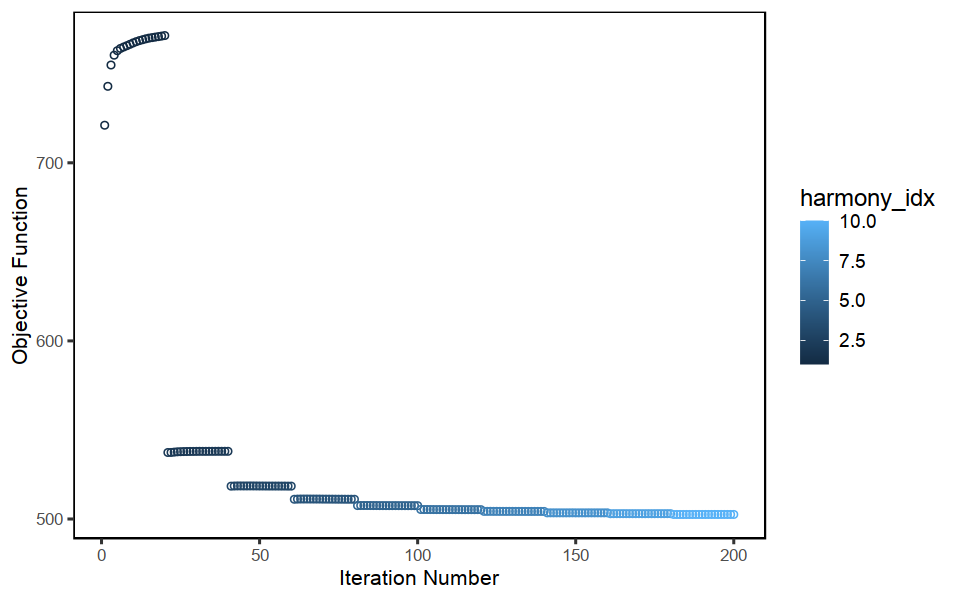

In [26]:
fig.size(5, 8)
set.seed(1)
obj <- create_object(counts, meta_data) %>% 
    do_harmony(
        'LibraryID', theta=.5, 
        max.iter.harmony=10, max.iter.cluster=20,
        epsilon.cluster = -Inf, epsilon.harmony = -Inf, 
        plot_convergence = TRUE
    )


In [27]:
obj$U <- do_umap(t(obj$Z_cos), `.spread` = 1.0, `.min_dist` = 0.3, .return_object=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Ignoring unknown parameters: segment.size”
Warning message:
“Ignoring unknown parameters: label.size, segment.size”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


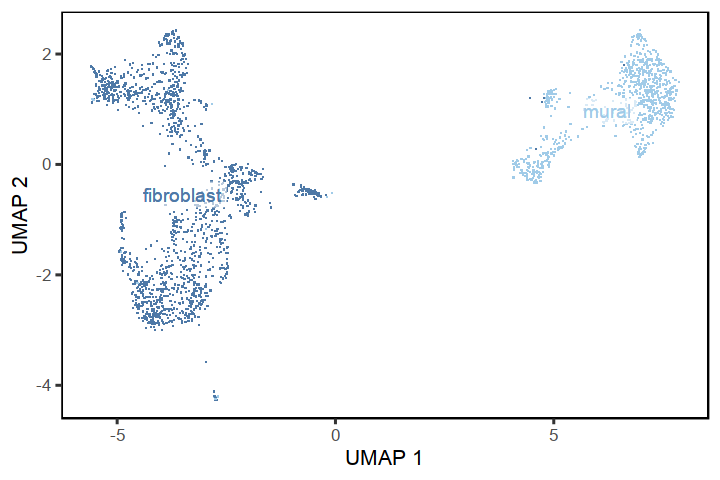

In [28]:
fig.size(4, 6)
do_scatter(obj$U$embedding, obj$meta_data, 'lineage')

### Enrich markers

In [29]:
markers <- map(
    paste0('Cluster ', 25:33), 
    function(sheetname) {
        openxlsx::read.xlsx('/data/srlab2/ik936/Roche/data/lung/Travaglini/41586_2020_2922_MOESM6_ESM.xlsx', sheetname, startRow = 2)$Gene# %>% head(100)
    }
)

names(markers) <- c('ASM', 'VSM', 'MyoF', 'FibM', 'AdvF', 'AlvF', 'LipF', 'Peri', 'Meso')

In [31]:
# # res <- singlecellmethods:::enrich_cells(ref$exprs_norm, markers, mode = 'unweighted')#$scores
# enrich_res <- singlecellmethods:::enrich_cells(ref$exprs_norm, markers, mode = 'weighted')$scores

# ## Convert to probabilities
# enrich_res <- prop.table(as.matrix(exp(enrich_res)), 1)

# ## Yes, we can identify the lipofibroblasts 
# fig.size(8, 12)
# ref$umap$embedding %>% 
#     data.frame() %>% 
#     cbind(enrich_res) %>% 
#     tidyr::gather(key, val, -matches('UMAP')) %>% 
#     split(.$key) %>% 
#     imap(function(.SD, .name) {
#         ggplot(.SD, aes(UMAP1, UMAP2, z = val)) + 
#             stat_summary_hex(bins = 150) + 
#             scale_fill_gradient2_tableau() + 
#             guides(fill = FALSE) + 
#             labs(title = .name)
#     }) %>% 
#     purrr::reduce(`+`)

# #     ggplot(aes(UMAP1, UMAP2, z = val)) + 
# #         stat_summary_hex(bins = 40) + 
# #         scale_fill_gradient2_tableau() + 
# #         facet_wrap(~key)

### Label Travaglini Clusters

In [32]:
obj[['fgraph']] <- obj$U$fgraph

In [33]:
suppressMessages({
    suppressWarnings({
        obj <- do_cluster(obj, 'fgraph', c(.2, .4, .8, 1.5, 2.5, 3))    
    })    
})


In [34]:
apply(obj$clusters_df, 2, table)

$res1

  0   1   2   3   4   5 
871 587 497 214  69  20 

$res2

  0   1   2   3   4   5   6 
587 556 493 319 214  69  20 

$res3

  0   1  10   2   3   4   5   6   7   8   9 
570 323  11 301 263 237 222 179  70  62  20 

$res4

  0   1  10  11  12  13  14  15  16  17  18   2   3   4   5   6   7   8   9 
488 258  68  62  54  45  24  20  16  12  11 234 221 200 172 159  76  70  68 

$res5

  0   1  10  11  12  13  14  15  16  17  18  19   2  20  21   3   4   5   6   7 
266 217  88  86  81  70  68  63  51  36  21  20 187  12  11 178 161 159 150 150 
  8   9 
 93  90 

$res6

  0   1  10  11  12  13  14  15  16  17  18  19   2  20  21  22  23  24  25  26 
174 160  86  85  84  79  73  69  67  56  51  50 159  44  32  32  25  21  21  11 
  3   4   5   6   7   8   9 
150 149 146 145 105  95  89 


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Ignoring unknown parameters: segment.size”
Warning message:
“Ignoring unknown parameters: label.size, segment.size”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


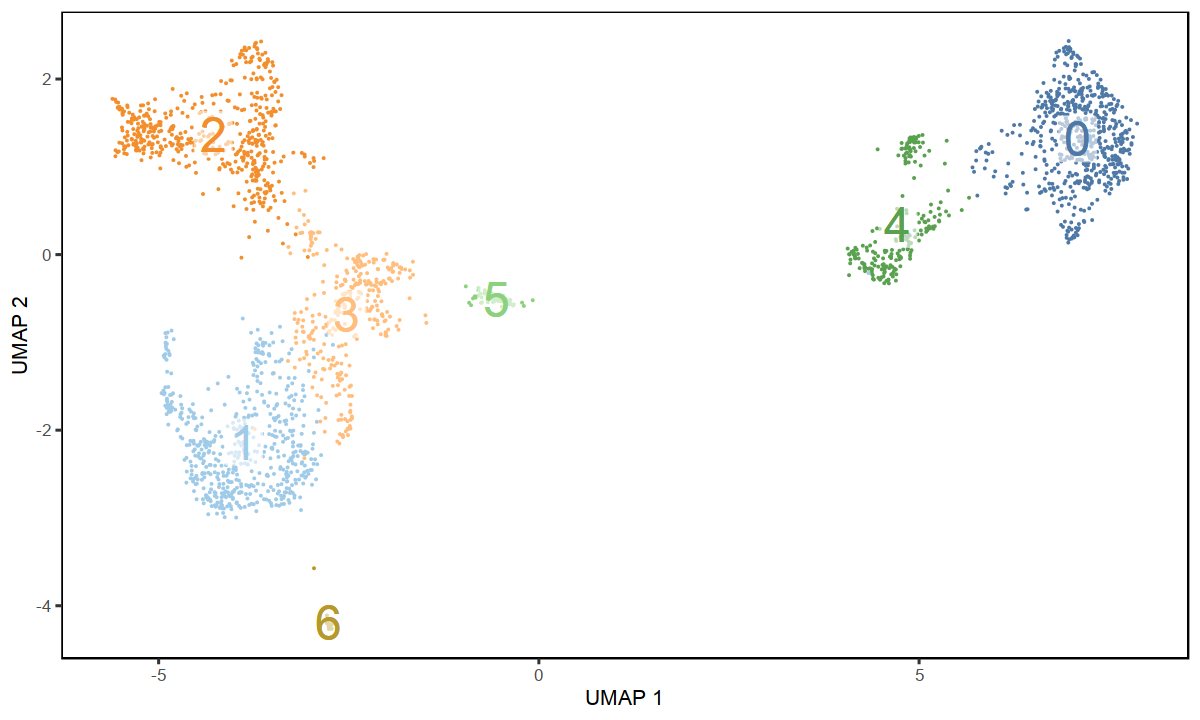

In [35]:
fig.size(6, 10)
do_scatter(obj$U$embedding, obj$clusters_df, 'res2', pt_shape = 16, pt_size = 10)
# do_scatter(obj$U$embedding, obj$clusters_df, 'res4', pt_shape = 16, pt_size = 10)

In [36]:
obj$meta_data$ClusterTrav <- case_when(
#     enrich_res[, 'Meso'] > 0.95 ~ 'Mesothelial', 
    obj$clusters_df$res2 %in% c('3', '5') ~ 'Myofibroblasts',
#     obj$clusters_df$res2 %in% c('5') ~ 'Fibromyocytes',
    obj$clusters_df$res2 %in% c('0') ~ 'Pericytes',
    obj$clusters_df$res2 %in% c('1') ~ 'AlveolarFibroblasts',
    obj$clusters_df$res4 %in% c('6') ~ 'AlveolarSmoothMuscle',
    obj$clusters_df$res4 %in% c('9', '16') ~ 'VascularSmoothMuscle',
    obj$clusters_df$res4 %in% c('3') ~ 'Lipofibroblasts',
    obj$clusters_df$res2 %in% c('2') ~ 'AdventitialFibroblasts'
)


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Ignoring unknown parameters: segment.size”
Warning message:
“Ignoring unknown parameters: label.size, segment.size”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 1 rows containing missing values (geom_label).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


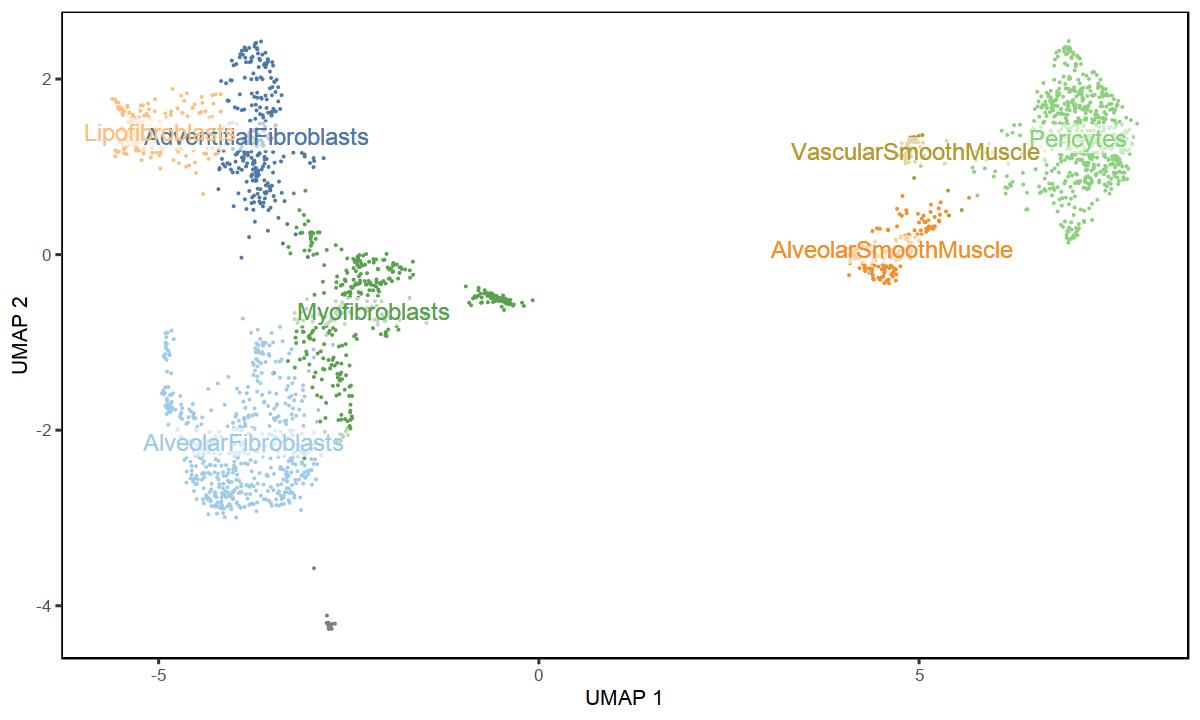

In [37]:
fig.size(6, 10)
do_scatter(obj$U$embedding, obj$meta_data, 'ClusterTrav', pt_shape = 16, pt_size = 5)

In [40]:
## Unlabaled cells 
sum(is.na(obj$meta_data$ClusterTrav))

[1] 21

### Make Ref

In [41]:
ref <- symphony::buildReferenceFromHarmonyObj(
    list(
        R=obj$R,
        Z_orig=t(obj$V),
        Z_corr=obj$Z_corr
    ), 
    obj$meta_data, 
    obj$vargenes_means_sds, 
    obj$loadings, 
    do_umap=TRUE,
    save_uwot_path=tempfile(tmpdir = '/data/srlab2/ik936/Roche/data/lung/', pattern = 'umap_')
    
)

ref$exprs_norm <- obj$exprs_norm
ref$exprs_raw <- obj$exprs_raw

Save metadata, vargenes (S), and loadings (U)

Save R, Z_orig, Z_corr, and betas from Harmony object

Calculate final L2 normalized reference centroids (Y_cos)

Calculate reference compression terms (Nr and C)

UMAP

Warning message:
“invalid uid value replaced by that for user 'nobody'”
Saved uwot model

Finished nicely.



In [42]:
file.remove(ref$save_uwot_path)
ref$umap <- obj$U
colnames(ref$umap$embedding) <- c('UMAP1', 'UMAP2')
.x <- uwot::save_uwot(obj$U, ref$save_uwot_path)

[1] TRUE

Warning message:
“invalid uid value replaced by that for user 'nobody'”


In [43]:
saveRDS(ref, '/data/srlab2/ik936/Roche/data/lung/stromal_ref_roche.rds')

### Heatmap

Prove that we got the right populations using marker genes. 


In [44]:
ref <- readRDS('/data/srlab2/ik936/Roche/data/lung/stromal_ref_roche.rds')

In [45]:
## Only use markers from their paper
genes_use <- intersect(Reduce(union, markers), rownames(ref$exprs_norm))
wilres <- wilcoxauc(ref$exprs_norm[genes_use, ], ref$meta_data$ClusterTrav)

Removing NA values from labels



In [46]:
### top_markers(wilres)

In [47]:
# ## Fibromyocytess
# wilres %>% subset(feature %in% c('MYH11', 'CNN1', 'TAGLN')) %>% arrange(-auc) %>% subset(auc > .6)
## Fibromyocytess
wilres %>% subset(feature %in% c('COX4I2', 'ACTG2')) %>% arrange(-auc) %>% subset(auc > .6)

,feature,group,avgExpr,logFC,statistic,auc,pval,padj,pct_in,pct_out
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,COX4I2,Pericytes,2.703853,2.492659,880212,0.9087936,1.531707e-289,1.938375e-286,85.68995,10.121212
2,ACTG2,AlveolarSmoothMuscle,1.524803,1.496035,269158,0.8146379,1.118979e-230,2.832136e-227,64.15094,1.443696


In [48]:
## Myofibroblasts
wilres %>% subset(feature %in% c('WIF1', 'FGF18', 'ASPN')) %>% arrange(-auc) %>% subset(auc > .6)

,feature,group,avgExpr,logFC,statistic,auc,pval,padj,pct_in,pct_out
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ASPN,Myofibroblasts,1.59036,1.324562,530131,0.7389492,2.436052e-96,3.082824e-93,57.21649,13.35857


### Locations in cross-tissue UMAP space

In [49]:
ref <- readRDS('/data/srlab2/ik936/Roche/data/lung/stromal_ref_roche.rds')

In [50]:
system.time({
    dname <- '/data/srlab2/ik936/Roche/data/cache/obj_fibroblasts/'
#     fields_load <- c('R', 'V', 'Z_corr', 'betas', 'meta_data', 'vargenes_means_sds', 'loadings', 'umap_after_fname')
#     fields_load <- c('meta_data', 'exprs_raw', 'umap_after', 'umap_before', 'V', 'Z_corr')
    fields_load <- c('meta_data', 'umap_after')
    atlas <- map(fields_load, function(name) {
        readRDS(file.path(dname, paste0(name, '.rds')))
    })
    names(atlas) <- fields_load    
})


   user  system elapsed 
  0.372   0.012   1.362 

In [51]:
.m <- atlas$umap_after %>% 
    cbind(atlas$meta_data) %>% 
    inner_join(dplyr::select(ref$meta_data, CellID, ClusterTrav)) %>% 
    subset(!ClusterTrav %in% c('Pericytes', 'VascularSmoothMuscle', 'AlveolarSmoothMuscle') & !is.na(ClusterTrav))

Joining, by = "CellID"



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


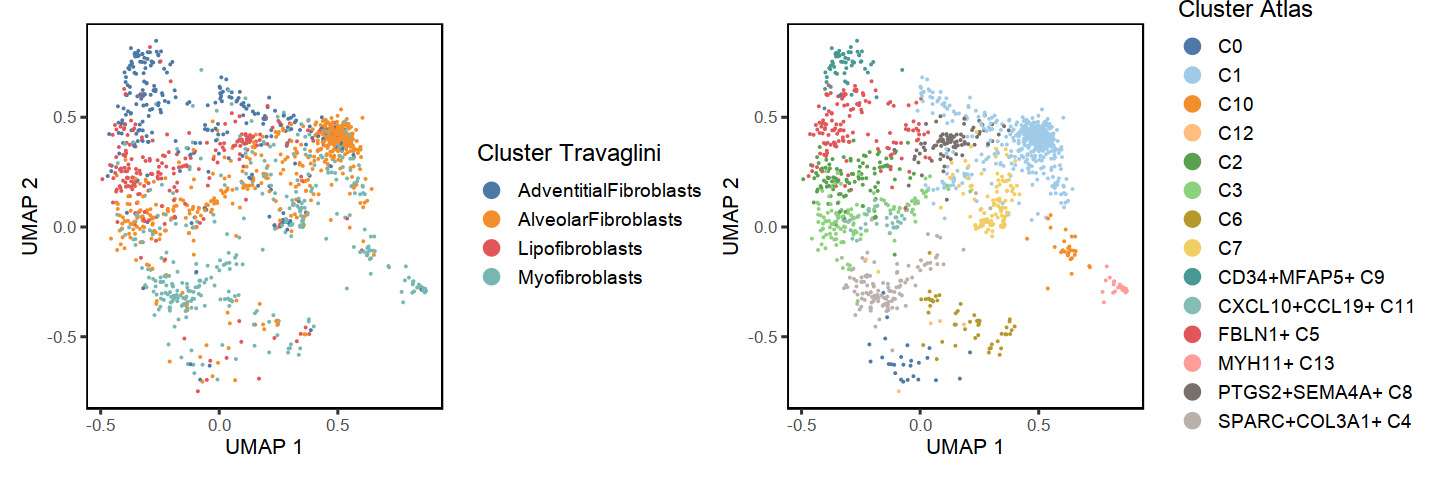

In [52]:
p1 <- do_scatter(
    dplyr::select(.m, `1`, `2`),
    dplyr::select(.m, -`1`, -`2`),
    'ClusterTrav',
    palette_use = tableau_color_pal()(6),
    pt_shape = 16, do_labels = FALSE, no_guides = FALSE 
) + 
labs(fill = 'Cluster Travaglini', color = 'Cluster Travaglini')

p2 <- do_scatter(
    dplyr::select(.m, `1`, `2`),
    dplyr::select(.m, -`1`, -`2`),
    'Cluster_name',
    pt_shape = 16, do_labels = FALSE, no_guides = FALSE 
) + 
labs(fill = 'Cluster Atlas', color = 'Cluster Atlas')

fig.size(4, 12)
p1 | p2

In [53]:
table(.m$Cluster)


  0   1  10  11  12  13   2   3   4   5   6   7   8   9 
 27 504  29  34   5  37 106 126 119 141  48 109  87  55 

In [54]:
atlas$meta_data %>% subset(Tissue == 'Lung') %>% with(table(Cluster_name))

Cluster_name
               C0                C1               C10               C12 
               28               505                29                 5 
               C2                C3                C6                C7 
              108               128                49               112 
   CD34+MFAP5+ C9 CXCL10+CCL19+ C11         FBLN1+ C5        MYH11+ C13 
               55                36               141                38 
 PTGS2+SEMA4A+ C8  SPARC+COL3A1+ C4 
               89               119 

### Presto Trav types

In [58]:
## Collapse Counts
pb <- presto::collapse_counts(
    obj$exprs_raw,
    obj$meta_data,
    c('LibraryID', 'ClusterTrav'),
    keep_n=TRUE, 
    how='sum'
) 
pb$meta_data$logUMI <- log(colSums(pb$counts_mat))


CAREFUL: get_norm makes very strong assumptions about data



In [60]:
genes_test <- rownames(pb$counts_mat)[which(rowSums(pb$counts_mat >= 3) >= 3)]# %>% head(100)
length(genes_test)


[1] 12169

In [62]:
library(lme4)
library(future)
library(furrr)
library(glue)
library(modelr)


In [64]:
## Fit Models
t2 <- system.time({
    suppressWarnings({
        obj$presto <- presto.presto(
#             formula = y~1+InflamScore_beta+(1|Cluster)+(1|LibraryID/Cluster)+(1|Tissue/Cluster)+offset(logUMI), 
            formula = y~1+(1|ClusterTrav)+(1|LibraryID/ClusterTrav)+offset(logUMI), 
            design = pb$meta_data, 
            response = pb$counts_mat, 
            size_varname = 'logUMI',
            features = genes_test,
            ncore = 20,
            nsim = 1e3,
            effects_cov = c('ClusterTrav'),
            min_sigma = .5,
            verbose = 1
        ) 
    })
})


CAUTION: if using GLMM, make sure your counts are integers!

Set up models

Learn the models

Aggregate the results

Cleap up names

Joining, by = "grpvar_orig"

Compute gene means



In [65]:
t2[['elapsed']] / 60

[1] 12.79065

### Extract effects

In [66]:
contrasts_mat <- make_contrast.presto(obj$presto, 'ClusterTrav')
obj$effects <- contrasts.presto(obj$presto, contrasts_mat, one_tailed = TRUE) %>% 
    dplyr::mutate(Cluster = contrast) %>% 
    arrange(pvalue) 


In [67]:
head(obj$effects)

contrast,feature,beta,sigma,zscore,pvalue,Cluster
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AdventitialFibroblasts,CCDC80,2.790983,0.1403744,19.88242,2.889051e-88,AdventitialFibroblasts
AdventitialFibroblasts,FBLN1,2.844317,0.1508247,18.85843,1.252831e-79,AdventitialFibroblasts
Lipofibroblasts,FBLN1,2.335430,0.1411789,16.54235,9.089774e-62,Lipofibroblasts
AdventitialFibroblasts,IGFBP6,2.422876,0.1480961,16.36016,1.840870e-60,AdventitialFibroblasts
AdventitialFibroblasts,C3,3.671159,0.2285277,16.06439,2.266342e-58,AdventitialFibroblasts
AlveolarSmoothMuscle,TPM2,2.317720,0.1579583,14.67299,4.801283e-49,AlveolarSmoothMuscle


### Cache

In [68]:
pryr::object_size(obj)

163 MB

In [70]:
saveRDS(obj, '/data/srlab2/ik936/Roche/data/lung/Travaglini/obj_mesenchymal')